# Setup

Importing necessary libraries and quickly reviewing the data

In [ ]:
!pip install ipython-autotime
import pandas as pd
import numpy as np
import re
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import plotly.io as pio
from datetime import datetime
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.45 s (started: 2022-12-09 15:20:01 +00:00)


In [ ]:
sns.set_theme()
df = pd.read_csv("/content/survey_results_public.csv")
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)
# Data.fillna(method="ffill")
df = df.replace('nan', pd.NA)

time: 1.52 s (started: 2022-12-09 15:20:04 +00:00)


## Drop Unnecessary Columns

Dropping all columns where we think the data is not useless for the question we are tackling as well as any overly underpopulated columns

In [ ]:
column_headers = list(df.columns.values)
print("The Column Header :", column_headers)

The Column Header : ['ResponseId', 'MainBranch', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency', 'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use', 'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction', 'VCHostingPersonal use', 'VCHostingProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith', 'Blockchain', 'NEWSOSites', 'SOVisitFreq', 'SOAcc

In [ ]:
names = {'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith', 'ResponseId', 'YearsCodePro', 'LearnCode', 'LearnCodeOnline', 'BuyNewTool', 'Currency', 'CompTotal', 'CompFreq', 'LanguageWantToWorkWith', 'DatabaseWantToWorkWith', 'PlatformWantToWorkWith', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use', 'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction', 'VCHostingPersonal use', 'VCHostingProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith', 'Blockchain', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'Accessibility', 'MentalHealth', 'TBranch', 'Knowledge_1', 'Knowledge_2', 'Knowledge_3', 'Knowledge_4', 'Knowledge_5', 'Knowledge_6', 'Knowledge_7', 'Frequency_1', 'Frequency_2', 'Frequency_3', 'TimeSearching', 'TimeAnswering', 'Onboarding', 'ProfessionalTech', 'TrueFalse_1', 'TrueFalse_2', 'TrueFalse_3', 'SurveyLength', 'SurveyEase'}

for col in names:
  df.pop(col)


time: 58.6 ms (started: 2022-12-09 15:20:06 +00:00)


In [ ]:
df.head()

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCodeCoursesCert,YearsCode,DevType,OrgSize,PurchaseInfluence,Country,LanguageHaveWorkedWith,Age,Gender,Trans,Sexuality,Ethnicity,ICorPM,WorkExp,ConvertedCompYearly
0,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,Canada,JavaScript;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,14,Data scientist or machine learning specialist;...,20 to 99 employees,I have some influence,United Kingdom of Great Britain and Northern I...,C#;C++;HTML/CSS;JavaScript;Python,25-34 years old,Man,No,Bisexual,White,NaN,NaN,40205.0
3,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,20,"Developer, full-stack",100 to 499 employees,I have some influence,Israel,C#;JavaScript;SQL;TypeScript,35-44 years old,Man,No,Straight / Heterosexual,White,NaN,NaN,215232.0
4,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,8,"Developer, front-end;Developer, full-stack;Dev...",20 to 99 employees,I have some influence,United States of America,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN


time: 30 ms (started: 2022-12-09 15:20:06 +00:00)


# Cleaning and Encoding

Cleaning all columns and creating an encoded dataframe to compute categorical feature correlation tests

## ConvertedCompYearly
Dropping All isntances where "ConvertedCompYearly" is Null.

This cut down the number of rows we had by half. 73268 --> 38071 rows

In [ ]:
df = df[pd.notnull(df['ConvertedCompYearly'])]
len(df)

22445

time: 39.7 ms (started: 2022-12-09 15:20:06 +00:00)


Filtered Dataframe to keep devs with clear employment status.
Full-time, part-time, Self Employed.

## Employment

We numered employment catagories using the following
>0 = "Employed, full-time"<br>
1 = "Employed, full-time;Employed, part-time" <br>
2 = "Employed, full-time;Independent contractor, freelancer, or self-employed"<br>
3 = "Employed, part-time" <br>
4 = "Independent contractor, freelancer, or self-employed"<br>
5 = "Employed, part-time;Independent contractor, freelancer, or selfemployed"









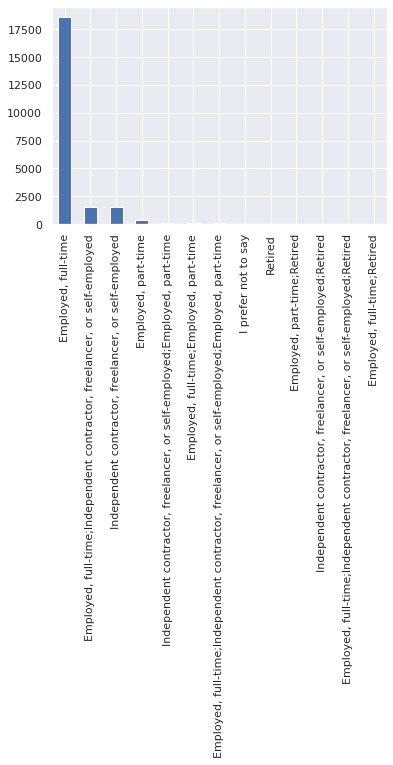

time: 374 ms (started: 2022-12-09 15:20:06 +00:00)


In [ ]:
df['Employment'].value_counts().plot.bar()

In [ ]:
emp_types = [
    'Employed, full-time',
    'Independent contractor, freelancer, or self-employed',
    'Employed, full-time;Independent contractor, freelancer, or self-employed',
    'Employed, part-time',
    'Independent contractor, freelancer, or self-employed;Employed, part-time',
    'Employed, full-time;Employed, part-time'
    ]

time: 878 µs (started: 2022-12-09 15:20:06 +00:00)


In [ ]:
df = df.loc[df['Employment'].isin(emp_types)]

time: 12.5 ms (started: 2022-12-09 15:20:06 +00:00)


In [ ]:
df_en = df.copy() #df_en will be the encoded version of df, just so at each point of the preprocessing we have an encoded version and a normal version that we can read.

time: 5.71 ms (started: 2022-12-09 15:20:06 +00:00)


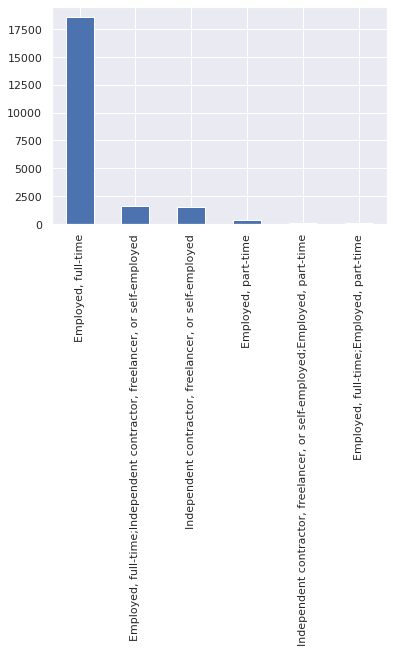

time: 379 ms (started: 2022-12-09 15:20:06 +00:00)


In [ ]:
df['Employment'].value_counts().plot.bar()

Label Encoded catergorical values of 'Employment' and 'MainBranch'

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df_en['Employment']= label_encoder.fit_transform(df['Employment'])
  # 0 = "Employed, full-time"
  # 1 = "Employed, full-time;Employed, part-time"
  # 2 = "Employed, full-time;Independent contractor, freelancer, or self-employed"
  # 3 = "Employed, part-time"
  # 4 = "Independent contractor, ..."
  # 5 = "Employed, part-time;Independent contractor, ..."
df_en['MainBranch']= label_encoder.fit_transform(df['MainBranch'])
  # 0 = "I am a developer by profession"
  # 1 = "I am not primarily a developer, but I write code sometimes as part of my work"

time: 38.6 ms (started: 2022-12-09 15:20:07 +00:00)


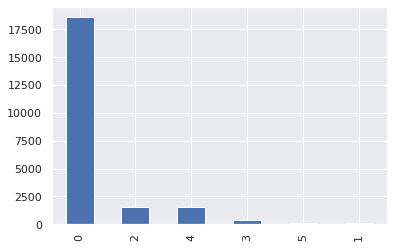

time: 318 ms (started: 2022-12-09 15:20:07 +00:00)


In [ ]:
df_en['Employment'].value_counts().plot.bar()

## RemoteWork

Replace each answer with its respective numeric values using the following system:
>1 = "Fully Remote"<br>
2 = "Hybrid" <br>
3 = "In Person"<br>

In [ ]:
#used .replace() here instead of LabelEncoder() in order to assign NaN as 0 manually
df_en = df_en.replace({'RemoteWork' : { np.nan : 0, 'Fully remote' : 1, 'Hybrid (some remote, some in-person)' : 2, 'Full in-person' : 3}})

time: 26.2 ms (started: 2022-12-09 15:20:07 +00:00)


## CodingActivities

>n = Number of activities<br>


0 = Bootstrapping a business<br>
1 = Bootstrapping a business;Freelance/contract work<br>
2 = Bootstrapping a business;Freelance/contract work;School or academic work<br>
3 = Bootstrapping a business;School or academic work<br>
4 = Contribute to open-source projects<br>
5 = Contribute to open-source projects;Bootstrapping a business<br>
6 = Contribute to open-source projects;Bootstrapping a business;Freelance/contract work<br>
7 = Contribute to open-source projects;Bootstrapping a business;Freelance/contract work;School or academic work<br>
8 = Contribute to open-source projects;Bootstrapping a business;School or academic work<br>
9 = Contribute to open-source projects;Freelance/contract work<br>
10 = Contribute to open-source projects;Freelance/contract work;School or academic work<br>
11 = Contribute to open-source projects;School or academic work<br>
12 = Freelance/contract work<br>
13 = Freelance/contract work;School or academic work<br>
14 = Hobby<br>
15 = Hobby;Bootstrapping a business<br>
16 = Hobby;Bootstrapping a business;Freelance/contract work<br>
17 = Hobby;Bootstrapping a business;Freelance/contract work;School or academic work<br>
18 = Hobby;Bootstrapping a business;School or academic work<br>
19 = Hobby;Contribute to open-source projects<br>
20 = Hobby;Contribute to open-source projects;Bootstrapping a business<br>
21 = Hobby;Contribute to open-source projects;Bootstrapping a business;Freelance/contract work<br>
22 = Hobby;Contribute to open-source projects;Bootstrapping a business;Freelance/contract work;School or academic work<br>
23 = Hobby;Contribute to open-source projects;Bootstrapping a business;School or academic work<br>
24 = Hobby;Contribute to open-source projects;Freelance/contract work<br>
25 = Hobby;Contribute to open-source projects;Freelance/contract work;School or academic work<br>
26 = Hobby;Contribute to open-source projects;School or academic work<br>
27 = Hobby;Freelance/contract work<br>
28 = Hobby;Freelance/contract work;School or academic work<br>
29 = Hobby;School or academic work<br>
30 = I don’t code outside of work<br>
31 = Other (please specify):<br>
32 = School or academic work<br>

In [ ]:
df_en['CodingActivities'] = df_en['CodingActivities'].replace({';Other \(please specify\):': '',
                                                               'Other \(please specify\):;': ''}, regex=True)
df_en['CodingActivities'] = label_encoder.fit_transform(df_en['CodingActivities'])

time: 71.4 ms (started: 2022-12-09 15:20:07 +00:00)


In [ ]:
label_encoder.classes_

array(['Bootstrapping a business',
       'Bootstrapping a business;Freelance/contract work',
       'Bootstrapping a business;Freelance/contract work;School or academic work',
       'Bootstrapping a business;School or academic work',
       'Contribute to open-source projects',
       'Contribute to open-source projects;Bootstrapping a business',
       'Contribute to open-source projects;Bootstrapping a business;Freelance/contract work',
       'Contribute to open-source projects;Bootstrapping a business;Freelance/contract work;School or academic work',
       'Contribute to open-source projects;Bootstrapping a business;School or academic work',
       'Contribute to open-source projects;Freelance/contract work',
       'Contribute to open-source projects;Freelance/contract work;School or academic work',
       'Contribute to open-source projects;School or academic work',
       'Freelance/contract work',
       'Freelance/contract work;School or academic work', 'Hobby',
       'Hob

time: 6.3 ms (started: 2022-12-09 15:20:07 +00:00)


## EdLevel

We used the following system:
>0 = "Something else"<br>
1 = "Elementary School"<br>
2 = "Secondary School" <br>
3 = "Some college/no degree"<br>
4 = "AS"<br>
5 = "BS"<br>
6 = "Professional Degree"<br>
7 = "MS"<br>
8 = "PHD"<br>

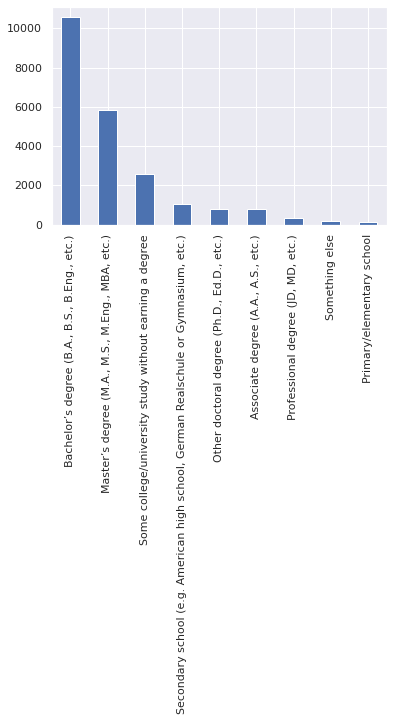

time: 343 ms (started: 2022-12-09 15:20:07 +00:00)


In [ ]:
df['EdLevel'].value_counts().plot.bar()

In [ ]:
df_en = df_en.replace({'EdLevel' : { #np.nan : 0,
                                    'Something else' : 0,
                                    'Primary/elementary school' : 1,
                                    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)' : 2,
                                    'Some college/university study without earning a degree' : 3,
                                    'Associate degree (A.A., A.S., etc.)' : 4,
                                    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)' : 5,
                                    'Professional degree (JD, MD, etc.)' : 6,
                                    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)' : 7,
                                    'Other doctoral degree (Ph.D., Ed.D., etc.)' : 8
                                    }})

time: 28.7 ms (started: 2022-12-09 15:20:08 +00:00)


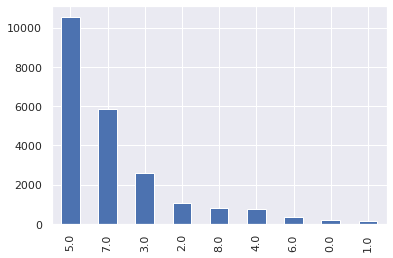

time: 250 ms (started: 2022-12-09 15:20:08 +00:00)


In [ ]:
df_en['EdLevel'].value_counts().plot.bar()

## LearnCodeCoursesCert

We used the following system:
>n = Number of certifications

In [ ]:
df_str = df_en['LearnCodeCoursesCert']

time: 1.03 ms (started: 2022-12-09 15:20:08 +00:00)


In [ ]:
df_str = df_str.replace('[A-z]+', 'Cert', regex=True)
df_str = df_str.replace( { np.nan : 0,
                         'Cert': 1,
                         'Cert;Cert': 2,
                         'Cert;Cert;Cert': 3,
                         'Cert;Cert;Cert;Cert': 4,
                         'Cert;Cert;Cert;Cert;Cert': 5,
                         'Cert;Cert;Cert;Cert;Cert;Cert': 6,
                         'Cert;Cert;Cert;Cert;Cert;Cert;Cert': 7,
                         'Cert;Cert;Cert;Cert;Cert;Cert;Cert;Cert': 8
                         })

time: 61.6 ms (started: 2022-12-09 15:20:08 +00:00)


In [ ]:
df_en['LearnCodeCoursesCert'] = df_str

time: 3.34 ms (started: 2022-12-09 15:20:08 +00:00)


## YearsCode

We used the following system:
>n = years coding

In [ ]:
df_en['YearsCode'] = df_en['YearsCode'].replace({'Less than 1 year': 0,
                                                 'More than 50 years': 51})

time: 11.7 ms (started: 2022-12-09 15:20:08 +00:00)


## DevType


In [ ]:
devType = df_en['DevType']

time: 1.09 ms (started: 2022-12-09 15:20:08 +00:00)


In [ ]:
pd.set_option("display.max_rows", 50)

time: 831 µs (started: 2022-12-09 15:20:08 +00:00)


In [ ]:
# Removing back-end, and front-end if they also said full-stack
# Removing Other for everyone except the ones who only responded Other
devType = devType.replace({'Developer, front-end;Developer, back-end':'Developer, full-stack',
                           'Developer, front-end;Developer, full-stack;Developer, back-end': 'Developer, full-stack',
                           'Developer, full-stack;Developer, back-end': 'Developer, full-stack',
                           'Developer, front-end;Developer, full-stack': 'Developer, full-stack',
                           ';Other \(please specify\):': '',
                           'Other \(please specify\):;' : ''
                           }, regex=True)
devType = devType.replace({'Project manager;Product manager': 'Manager',
                           'Project manager;' : 'Manager',
                           'Product manager;' : 'Manager',
                           'Product manager' : 'Manager',
                           'Project manager' : 'Manager'
                          }, regex=True)
devType = devType.replace({'Engineering manager;Manager': 'Manager',
                           'Engineering manager' : 'Manager'}
                          , regex=True)

devType = devType.replace({'.*Developer, front-end.*': 'Developer, front-end',
                           '.*Developer, back-end.*' : 'Developer, back-end',
                           '.*Developer, full-stack.*': 'Developer, full-stack'
                           }, regex=True)

devType = devType.replace('([^;]*;).*', 'Multi-Disiplinary', regex=True)


df_en['DevType'] = devType

time: 1.06 s (started: 2022-12-09 15:20:08 +00:00)


In [ ]:
df_en['DevType'] = label_encoder.fit_transform(df_en['DevType'])
label_encoder.classes_

array(['Academic researcher', 'Blockchain',
       'Cloud infrastructure engineer', 'Data or business analyst',
       'Data scientist or machine learning specialist',
       'Database administrator', 'Designer', 'DevOps specialist',
       'Developer, QA or test', 'Developer, back-end',
       'Developer, desktop or enterprise applications',
       'Developer, embedded applications or devices',
       'Developer, front-end', 'Developer, full-stack',
       'Developer, game or graphics', 'Developer, mobile', 'Educator',
       'Engineer, data', 'Engineer, site reliability', 'Manager',
       'ManagerBlockchain', 'ManagerCloud infrastructure engineer',
       'ManagerData or business analyst', 'ManagerDesigner',
       'ManagerMarketing or sales professional',
       'ManagerSecurity professional',
       'ManagerSenior Executive (C-Suite, VP, etc.)',
       'ManagerSystem administrator', 'Marketing or sales professional',
       'Multi-Disiplinary', 'Other (please specify):', 'Scientis

time: 15 ms (started: 2022-12-09 15:20:09 +00:00)


## OrgSize

We used the following system:
>0 = "I don't know"<br>
1 = "Just me"<br>
2 = "2-9" <br>
3 = "10-19"<br>
4 = "20-99"<br>
5 = "100-499"<br>
6 = "500-999"<br>
7 = "1000-4999"<br>
8 = "5000-9999"<br>
9 = "10,000 or more"

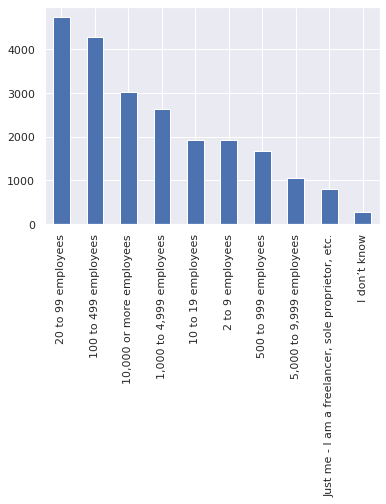

time: 287 ms (started: 2022-12-09 15:20:09 +00:00)


In [ ]:
df['OrgSize'].value_counts().plot.bar()

In [ ]:
df_en = df_en.replace({'OrgSize' : { np.nan : 0,
                                    'I don’t know' : 0,
                                    'Just me - I am a freelancer, sole proprietor, etc.' : 1,
                                    '2 to 9 employees' : 2,
                                    '10 to 19 employees' : 3,
                                    '20 to 99 employees' : 4,
                                    '100 to 499 employees' : 5,
                                    '500 to 999 employees' : 6,
                                    '1,000 to 4,999 employees' : 7,
                                    '5,000 to 9,999 employees' : 8,
                                    '10,000 or more employees' : 9,
                                    }})

time: 25.8 ms (started: 2022-12-09 15:20:10 +00:00)


## PurchaseInfluence

We used the following system:
>0 = "I have little to no influence"<br>
1 = "I have some influence"<br>
2 = "I have great deal of influence" <br>

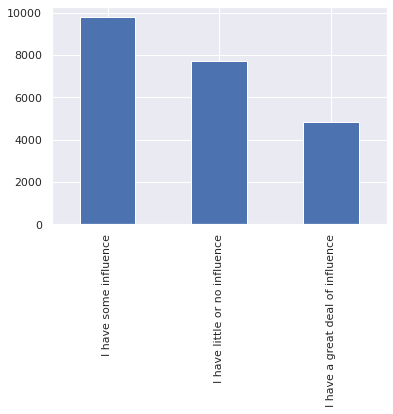

time: 217 ms (started: 2022-12-09 15:20:10 +00:00)


In [ ]:
df['PurchaseInfluence'].value_counts().plot.bar()

In [ ]:
df_en = df_en.replace({'PurchaseInfluence' : { np.nan : 0,
                                    'I have little or no influence' : 0,
                                    'I have some influence' : 1,
                                    'I have a great deal of influence' : 2
                                    }})

time: 24.1 ms (started: 2022-12-09 15:20:10 +00:00)


## Country

We used the following system:
>n = index in list of unique countries

In [ ]:
df_en['Country'].unique()

array(['United Kingdom of Great Britain and Northern Ireland', 'Israel',
       'Netherlands', 'United States of America', 'Czech Republic',
       'Austria', 'Italy', 'Canada', 'Germany', 'Ireland', 'Poland',
       'Madagascar', 'Norway', 'Taiwan', 'France', 'Brazil', 'Uruguay',
       'Sweden', 'Spain', 'Turkey', 'Romania', 'Singapore', 'India',
       'Belgium', 'Bulgaria', 'Greece', 'Portugal', 'Russian Federation',
       'Saudi Arabia', 'Mexico', 'Kenya', 'Switzerland', 'Latvia',
       'South Africa', 'Thailand', 'China', 'Montenegro', 'Finland',
       'Slovakia', 'Japan', 'Denmark', 'Australia', 'Viet Nam',
       'Argentina', 'Hungary', 'Tunisia', 'Bangladesh', 'Ukraine',
       'Maldives', 'Hong Kong (S.A.R.)', 'Egypt', 'Serbia', 'Pakistan',
       'Nepal', 'Croatia', 'Indonesia', 'Bosnia and Herzegovina',
       'Armenia', 'Lithuania', 'Iran, Islamic Republic of...', 'Belarus',
       'Costa Rica', 'Mauritius', 'Estonia', 'Kazakhstan', 'Morocco',
       'Philippines', 'Chi

time: 7.98 ms (started: 2022-12-09 15:20:10 +00:00)


In [ ]:
countries = ['United Kingdom of Great Britain and Northern Ireland', 'Israel',
       'Netherlands', 'United States of America', 'Czech Republic',
       'Austria', 'Italy', 'Canada', 'Germany', 'Ireland', 'Poland',
       'Madagascar', 'Norway', 'Taiwan', 'France', 'Brazil', 'Uruguay',
       'Sweden', 'Spain', 'Turkey', 'Romania', 'Singapore', 'India',
       'Belgium', 'Bulgaria', 'Greece', 'Portugal', 'Russian Federation',
       'Saudi Arabia', 'Mexico', 'Kenya', 'Switzerland', 'Latvia',
       'South Africa', 'Thailand', 'China', 'Montenegro', 'Finland',
       'Slovakia', 'Japan', 'Denmark', 'Australia', 'Viet Nam',
       'Argentina', 'Hungary', 'Tunisia', 'Bangladesh', 'Ukraine',
       'Maldives', 'Hong Kong (S.A.R.)', 'Egypt', 'Serbia', 'Pakistan',
       'Nepal', 'Croatia', 'Indonesia', 'Bosnia and Herzegovina',
       'Armenia', 'Lithuania', 'Iran, Islamic Republic of...', 'Belarus',
       'Costa Rica', 'Mauritius', 'Estonia', 'Kazakhstan', 'Morocco',
       'Philippines', 'Chile', 'New Zealand', 'Slovenia', 'Ecuador',
       'Cyprus', 'Peru', 'Colombia', 'Afghanistan', 'Nicaragua',
       'Andorra', 'Republic of Korea', 'Lebanon', 'South Korea',
       'Malaysia', 'Sri Lanka', 'Guatemala', 'Jordan', 'Azerbaijan',
       'United Arab Emirates', 'Qatar', 'Nigeria', 'Uzbekistan',
       'Ethiopia', 'Luxembourg',
       'The former Yugoslav Republic of Macedonia',
       'Syrian Arab Republic', 'Cambodia', 'Fiji', 'Mongolia',
       'Republic of Moldova', 'Tajikistan', 'Timor-Leste', 'Ghana',
       'United Republic of Tanzania', 'Algeria', 'Cameroon', 'Kosovo',
       'Georgia', 'Turkmenistan', 'Botswana', 'Albania', 'Myanmar',
       'Palestine', 'Senegal', 'Dominican Republic', 'Rwanda', 'Malta',
       'Venezuela, Bolivarian Republic of...', 'Cuba', 'Kuwait',
       'El Salvador', 'Bolivia', 'Isle of Man', 'Honduras', 'Mali',
       'Panama', "Lao People's Democratic Republic", 'Iceland', 'Bahrain',
       'Paraguay', 'Uganda', 'Democratic Republic of the Congo',
       "Côte d'Ivoire", 'Barbados', 'Kyrgyzstan', 'Nomadic', 'Iraq',
       'Congo, Republic of the...', 'Libyan Arab Jamahiriya',
       'Mozambique', 'Angola', 'Oman', 'Yemen', 'Sudan', 'Zambia',
       'Somalia', 'Guinea', 'Zimbabwe', 'Cape Verde',
       'Trinidad and Tobago', 'Benin', 'Bhutan', 'Togo', 'Suriname',
       'Jamaica', 'Haiti', 'Malawi', 'Guyana', 'Palau', 'Monaco',
       'Saint Lucia', 'Seychelles']

for index, country in enumerate(countries):
  df_en['Country'] = df_en['Country'].replace(to_replace=country,
    value=index)

time: 372 ms (started: 2022-12-09 15:20:10 +00:00)


## Age

Replace ranges with numbers using natural progression

We used the following system:
>n = Age

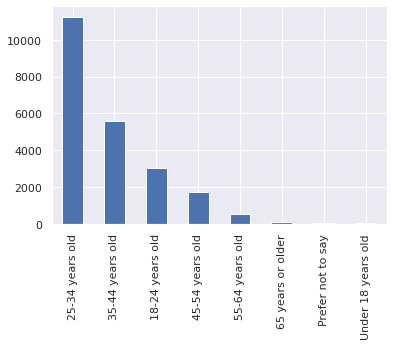

time: 273 ms (started: 2022-12-09 15:20:10 +00:00)


In [ ]:
df['Age'].value_counts().plot.bar()

In [ ]:
df_en = df_en.replace({'Age' : { np.nan : 0,
                                    'Prefer not to say' : 0,
                                    'Under 18 years old' : 1,
                                    '18-24 years old' : 2,
                                    '25-34 years old' : 3,
                                    '35-44 years old' : 4,
                                    '45-54 years old' : 5,
                                    '55-64 years old' : 6,
                                    '65 years or older' : 7
                                    }})

time: 23.7 ms (started: 2022-12-09 15:20:11 +00:00)


## Gender

We used the following system:
>0 = "Man"<br>
1 = "Women"<br>
2 = "Prefer not to say" <br>
3 = "Non-binary"<br>

In [ ]:
df_en = df_en.replace({'Gender' : { np.nan : 0,
                                    'Man' : 0,
                                    'Woman' : 1,
                                    'Prefer not to say' : 2,
                                    'Non-binary, genderqueer, or gender non-conforming' : 3
                                    }})

for rows in df_en['Gender']:
  if (type(rows) != int) and (len(rows)>2):
    df_en.replace(rows , 4 , inplace=True)

time: 1.27 s (started: 2022-12-09 15:20:11 +00:00)


## Trans

Replace answers with numbers using the following system:
>0 = "No"<br>
1 = "Yes"<br>
2 = "Or, in other words" <br>
3 = "Prefer not to say"<br>

In [ ]:
df_en = df_en.replace({'Trans' : { np.nan : 0,
                                    'No' : 0,
                                    'Yes' : 1,
                                    'Or, in your own words:' : 2,
                                    'Prefer not to say' : 3
                                    }})

time: 44.4 ms (started: 2022-12-09 15:20:12 +00:00)


## Sexuality

We used the following system:
>0 = "Straight"<br>
1 = "Prefer not to say"<br>
2 = "Bisexual" <br>
3 = "Gay"<br>
4 = "Queer"<br>
5 = "Prefer to self-describe"<br>

In [ ]:
df_en = df_en.replace({'Sexuality' : { #np.nan : 0,
                                    'Straight / Heterosexual' : 0,
                                    'Prefer not to say' : 1,
                                    'Bisexual' : 2,
                                    'Gay or Lesbian' : 3,
                                    'Queer' : 4,
                                    'Prefer to self-describe:' : 5
                                    }})

for rows in df_en['Sexuality']:
  if (type(rows) != int) and (type(rows) != float) and (len(rows)>2):
    df_en.replace(rows , 6 , inplace=True)

time: 1.82 s (started: 2022-12-09 15:20:12 +00:00)


## Ethnicity

In [ ]:
df['Ethnicity'].value_counts()

White                                                             5459
European                                                          5087
White;European                                                    3024
Indian                                                            1097
Asian                                                              692
                                                                  ... 
White;European;Caribbean;Central American;Hispanic or Latino/a       1
Asian;East Asian;Hispanic or Latino/a;Biracial                       1
European;Middle Eastern;Hispanic or Latino/a;Multiracial             1
White;South Asian                                                    1
European;African;Black                                               1
Name: Ethnicity, Length: 501, dtype: int64

time: 13.8 ms (started: 2022-12-09 15:20:14 +00:00)


In [ ]:
df_en = df_en.replace({'Ethnicity' : { #np.nan : 0,
                                    'White' : 0,
                                    'European' : 0,
                                    'White;European' : 0,
                                    'North American' : 0,
                                    'Asian' : 1,
                                    'Southeast Asian' : 1,
                                    'South Asian' : 1,
                                    'Indian' : 1,
                                    'Central Asian' : 1,
                                    'Middle Eastern' : 1,
                                    'African' : 2,
                                    'Black' : 2,
                                    'South American' : 3,
                                    'Hispanic or Latino/a' : 3,
                                    'Native American' : 4,
                                    'Prefer not to say' : 5,
                                    'Or, in your own words:' : 5,
                                    'Multiracial' : 6,
                                    }})

time: 49.4 ms (started: 2022-12-09 15:20:14 +00:00)


In [ ]:
for rows in df_en['Ethnicity']:
   if (type(rows) != int) and (type(rows) != float):
      if(rows.count(';')>0):
        df_en.replace(rows , 6, inplace=True )
      elif(len(rows)>2):
        df_en.replace(rows , 5, inplace=True )

time: 22.7 s (started: 2022-12-09 15:20:14 +00:00)


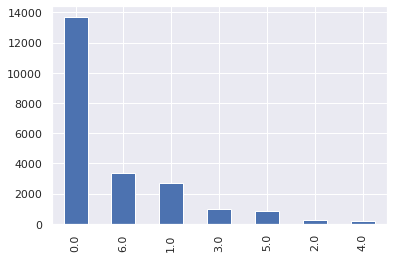

time: 204 ms (started: 2022-12-09 15:20:37 +00:00)


In [ ]:
df_en['Ethnicity'].value_counts().plot.bar()

## LanguageHaveWorkedWith

We used the following system:
>n = count of languages

In [ ]:
df['LanguageHaveWorkedWith'].value_counts()

HTML/CSS;JavaScript;TypeScript                                                                               464
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                                        233
Python                                                                                                       224
HTML/CSS;JavaScript;PHP;SQL                                                                                  215
C#;HTML/CSS;JavaScript;SQL                                                                                   200
                                                                                                            ... 
Bash/Shell;C#;HTML/CSS;Java;JavaScript;Kotlin;MATLAB;PHP;PowerShell;Python;Ruby;Scala;SQL;TypeScript;VBA       1
Assembly;Bash/Shell;C;C++;Dart;HTML/CSS;Java;JavaScript;Kotlin;OCaml;Python;Scala;Solidity;SQL;TypeScript      1
Bash/Shell;Go;HTML/CSS;JavaScript;PowerShell;Python;TypeScript                                  

time: 19.7 ms (started: 2022-12-09 15:20:37 +00:00)


In [ ]:
for rows in df_en['LanguageHaveWorkedWith']:
  if (type(rows) != int) and (type(rows) != float):
    df_en.replace(rows , rows.count(';')+1, inplace=True )

time: 1min 13s (started: 2022-12-09 15:20:37 +00:00)


## ICorPM

We used the following system:
>0 = "Independent"<br>
1 = "People manager"

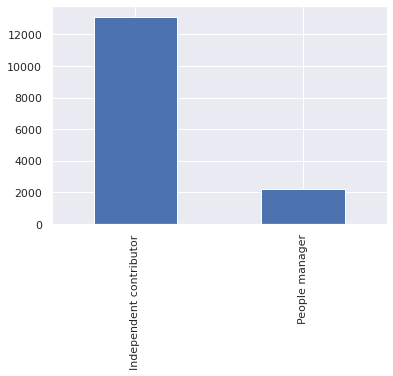

time: 168 ms (started: 2022-12-09 15:21:50 +00:00)


In [ ]:
df['ICorPM'].value_counts().plot.bar()

In [ ]:
df_en = df_en.replace({'ICorPM' : { np.nan : 0,
                                    'Independent contributor' : 0,
                                    'People manager' : 1
                                    }})

time: 19.1 ms (started: 2022-12-09 15:21:51 +00:00)


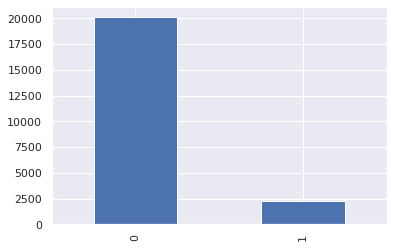

time: 185 ms (started: 2022-12-09 15:21:51 +00:00)


In [ ]:
df_en['ICorPM'].value_counts().plot.bar()

## WorkExp

We used the following system
>n = work experience in years

In [ ]:
# Calculate avg per age group and assign avg to those age groups with NaNs
for i in df_en['WorkExp'].index:
  if np.isnan(df_en.loc[i, 'WorkExp']):
    age = df_en.loc[i, 'Age']
    aDF = df_en[df_en['Age'] == age]
    avg = aDF['WorkExp'].mean()
    df_en.loc[i,'WorkExp'] = avg

time: 16.4 s (started: 2022-12-09 15:21:51 +00:00)


## Checking Data

Looking at NaN counts in each column and trying to convert them

In [ ]:
for col in df_en.columns:
  count_nan = df_en[col].isna().sum()
  print ('Count of NaNs in '+ str(col) +': ' + str(count_nan))

Count of NaNs in MainBranch: 0
Count of NaNs in Employment: 0
Count of NaNs in RemoteWork: 0
Count of NaNs in CodingActivities: 0
Count of NaNs in EdLevel: 7
Count of NaNs in LearnCodeCoursesCert: 0
Count of NaNs in YearsCode: 42
Count of NaNs in DevType: 0
Count of NaNs in OrgSize: 0
Count of NaNs in PurchaseInfluence: 0
Count of NaNs in Country: 0
Count of NaNs in LanguageHaveWorkedWith: 66
Count of NaNs in Age: 0
Count of NaNs in Gender: 0
Count of NaNs in Trans: 0
Count of NaNs in Sexuality: 818
Count of NaNs in Ethnicity: 293
Count of NaNs in ICorPM: 0
Count of NaNs in WorkExp: 0
Count of NaNs in ConvertedCompYearly: 0
time: 26.8 ms (started: 2022-12-09 15:22:07 +00:00)


In [ ]:
for col in df_en.columns:
    for row in df[col]:
      if (type(row) != int) and (type(row) != float) and (type(row) != str):
        if row.isna():
          df_en.replace(row, col.mode(), inplace=True)

time: 288 ms (started: 2022-12-09 15:22:07 +00:00)


In [ ]:
for col in df_en.columns:
  count_nan = df_en[col].isna().sum()
  print ('Count of NaNs in '+ str(col) +': ' + str(count_nan))

Count of NaNs in MainBranch: 0
Count of NaNs in Employment: 0
Count of NaNs in RemoteWork: 0
Count of NaNs in CodingActivities: 0
Count of NaNs in EdLevel: 7
Count of NaNs in LearnCodeCoursesCert: 0
Count of NaNs in YearsCode: 42
Count of NaNs in DevType: 0
Count of NaNs in OrgSize: 0
Count of NaNs in PurchaseInfluence: 0
Count of NaNs in Country: 0
Count of NaNs in LanguageHaveWorkedWith: 66
Count of NaNs in Age: 0
Count of NaNs in Gender: 0
Count of NaNs in Trans: 0
Count of NaNs in Sexuality: 818
Count of NaNs in Ethnicity: 293
Count of NaNs in ICorPM: 0
Count of NaNs in WorkExp: 0
Count of NaNs in ConvertedCompYearly: 0
time: 22.9 ms (started: 2022-12-09 15:22:08 +00:00)


# Analyzing Data

Computing categorical feature correlation tests

## Heatmap

### Head()

In [ ]:
df_en.to_csv('EncodedDF.csv')
df_en.head()

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCodeCoursesCert,YearsCode,DevType,OrgSize,PurchaseInfluence,Country,LanguageHaveWorkedWith,Age,Gender,Trans,Sexuality,Ethnicity,ICorPM,WorkExp,ConvertedCompYearly
2,1,0,2,14,7.0,0,14,12,4,1,0,5.0,3,0,0,2.0,0.0,0,6.765952,40205.0
3,0,0,1,30,5.0,0,20,13,5,1,1,4.0,4,0,0,0.0,0.0,0,14.818277,215232.0
8,0,0,2,30,7.0,0,6,9,0,0,2,NaN,3,1,0,5.0,0.0,0,6.000000,49056.0
10,0,0,2,30,5.0,0,5,13,5,0,0,6.0,2,0,0,0.0,0.0,0,2.696667,60307.0
11,1,2,1,24,5.0,0,12,19,4,1,3,7.0,4,0,0,0.0,0.0,1,14.000000,194400.0


time: 219 ms (started: 2022-12-09 15:22:22 +00:00)


### Creating Heatmap

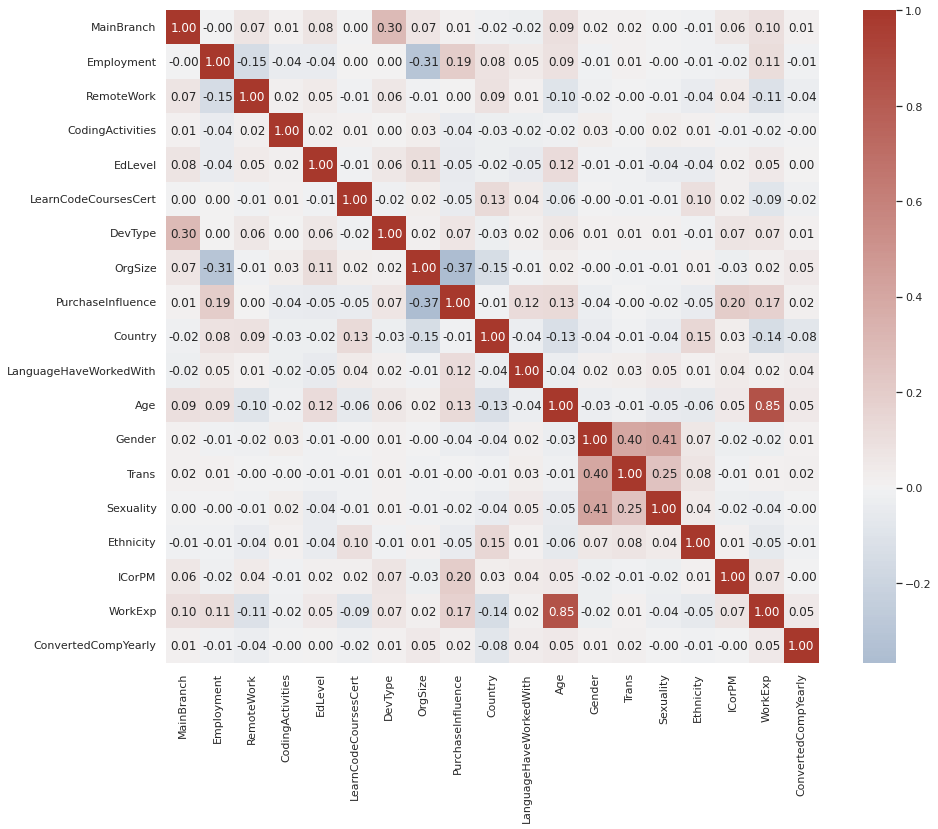

time: 2.64 s (started: 2022-12-09 07:02:17 +00:00)


In [ ]:
corr = df_en.corr()

plt.figure(figsize=(16,12))

cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

_ = sns.heatmap(corr, center=0, annot=True,
                fmt='.2f', square=True, cmap=cmap)

### Creating Heatmap with a mask

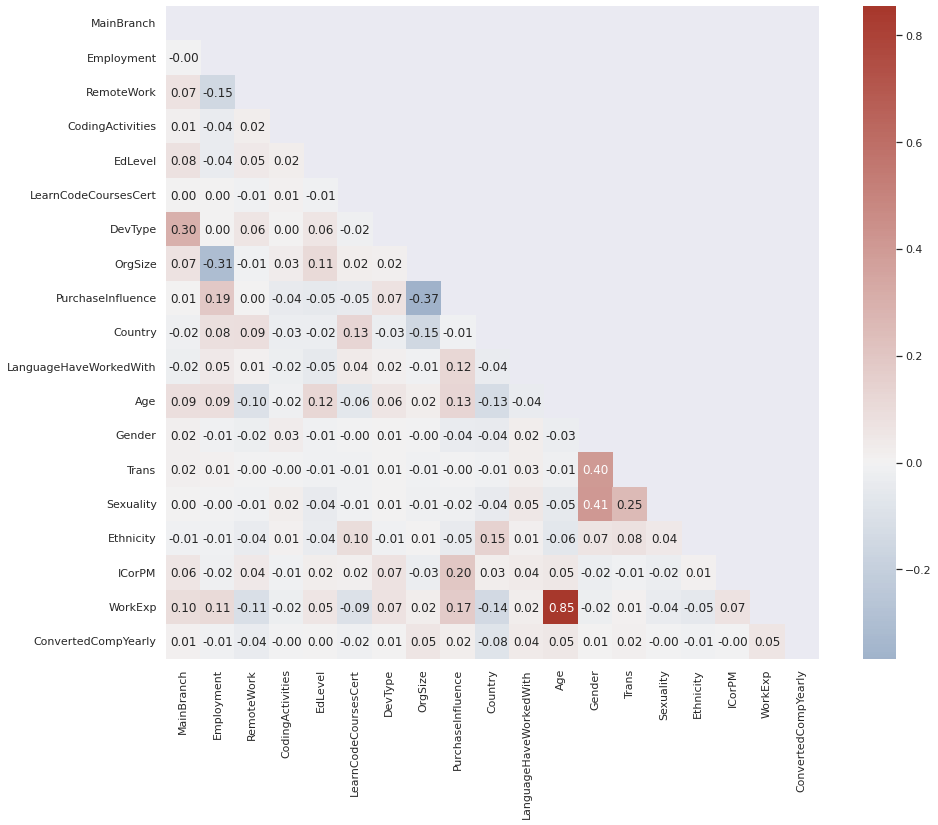

time: 3.41 s (started: 2022-12-09 07:02:20 +00:00)


In [ ]:
plt.figure(figsize=(16,12))

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)

## KNN

### Dropping NaNs for KNN

In [ ]:
count_row = df_en.shape[0]
print(count_row)

37889
time: 8.59 ms (started: 2022-12-09 07:02:23 +00:00)


In [ ]:
df_en.dropna(inplace = True)

time: 54.9 ms (started: 2022-12-09 07:02:23 +00:00)


In [ ]:
count_row = df_en.shape[0]
print(count_row)

36151
time: 2.46 ms (started: 2022-12-09 07:02:23 +00:00)


### Fitting KNN and Predicting

#### Set Up:

In [ ]:
df_en_train = df_en.loc[:30000].copy()
df_en_test = df_en.loc[30001:].copy()

X_train = df_en_train[["LanguageHaveWorkedWith", "EdLevel", "Gender", "Sexuality", "Trans", "Ethnicity", "RemoteWork", "ICorPM", "MainBranch", "Employment", "CodingActivities", "LearnCodeCoursesCert", "DevType", "OrgSize", "PurchaseInfluence", "Country", "Age", "WorkExp"]]
y_train = df_en_train["ConvertedCompYearly"]
X_test = df_en_test[["LanguageHaveWorkedWith", "EdLevel", "Gender", "Sexuality", "Trans", "Ethnicity", "RemoteWork", "ICorPM", "MainBranch", "Employment", "CodingActivities", "LearnCodeCoursesCert", "DevType", "OrgSize", "PurchaseInfluence", "Country", "Age", "WorkExp"]]
y_test = df_en_test["ConvertedCompYearly"]

time: 22.8 ms (started: 2022-12-09 07:02:24 +00:00)


#### Prediciting using following features:

1 Language worked with, masters, male, straight, not trans, asian, remote, independent contributor, branch 0, full time employee, 1 coding hobby, 0 certifications, full stack dev, 100-499 org size, no purchase influence, UK, 26 years old, 0 work experience

In [ ]:
z = pd.DataFrame({
    'LanguageHaveWorkedWith' : [1],
    'EdLevel' : [7],
    'Gender' : [0],
    'Sexuality' : [0],
    'Trans' : [0],
    'Ethnicity' : [1],
    'RemoteWork' : [0],
    'ICorPM' : [0],
    'MainBranch' : [0],
    'Employment' : [0],
    'CodingActivities' : [1],
    'LearnCodeCoursesCert' : [0],
    'DevType' : [13],
    'OrgSize' : [5],
    'PurchaseInfluence' : [0],
    'Country' : [1],
    'Age' : [26],
    'WorkExp' : [0],
})

# Fit k-nearest neighbors
model = KNeighborsRegressor(n_neighbors=58)
model.fit(
    X=df_en_train[["LanguageHaveWorkedWith", "EdLevel", "Gender", "Sexuality", "Trans", "Ethnicity", "RemoteWork", "ICorPM", "MainBranch", "Employment", "CodingActivities", "LearnCodeCoursesCert", "DevType", "OrgSize", "PurchaseInfluence", "Country", "Age", "WorkExp"]],
    y=df_en_train["ConvertedCompYearly"]
)

# Make predictions at those feature values.
predicted = model.predict(
    X = df_en_test[["LanguageHaveWorkedWith", "EdLevel", "Gender", "Sexuality", "Trans", "Ethnicity", "RemoteWork", "ICorPM", "MainBranch", "Employment", "CodingActivities", "LearnCodeCoursesCert", "DevType", "OrgSize", "PurchaseInfluence", "Country", "Age", "WorkExp"]]
)
print("Total Predicted Comp: $" + str(model.predict(z)[0]))

Total Predicted Comp: $320717.6551724138
time: 10.8 s (started: 2022-12-09 07:02:24 +00:00)


#### Prediciting using following features:

5 Language worked with, phd, male, straight, not trans, white, in person, independent contributor, branch 0, full time employee, 5 coding hobbies, 5 certifications, full stack dev, 5000-9999 org size, small purchase influence, UK, 33 years old, 8 work experience

In [ ]:
z = pd.DataFrame({
    'LanguageHaveWorkedWith' : [5],
    'EdLevel' : [8],
    'Gender' : [0],
    'Sexuality' : [0],
    'Trans' : [0],
    'Ethnicity' : [0],
    'RemoteWork' : [2],
    'ICorPM' : [0],
    'MainBranch' : [0],
    'Employment' : [0],
    'CodingActivities' : [5],
    'LearnCodeCoursesCert' : [5],
    'DevType' : [13],
    'OrgSize' : [8],
    'PurchaseInfluence' : [1],
    'Country' : [1],
    'Age' : [33],
    'WorkExp' : [8],
})


# Make predictions at those feature values.
predicted = model.predict(
    X = df_en_test[["LanguageHaveWorkedWith", "EdLevel", "Gender", "Sexuality", "Trans", "Ethnicity", "RemoteWork", "ICorPM", "MainBranch", "Employment", "CodingActivities", "LearnCodeCoursesCert", "DevType", "OrgSize", "PurchaseInfluence", "Country", "Age", "WorkExp"]]
)
print("Total Predicted Comp: $" + str(model.predict(z)[0]))

Total Predicted Comp: $250523.0172413793
time: 6.69 s (started: 2022-12-09 07:02:34 +00:00)


#### Why did the higher education get paid less?

#### Prediciting using following features:

5 Language worked with, phd, female, straight, not trans, white, in person, independent contributor, branch 0, full time employee, 5 coding hobbies, 5 certifications, full stack dev, 5000-9999 org size, small purchase influence, UK, 33 years old, 8 work experience

In [ ]:
z = pd.DataFrame({
    'LanguageHaveWorkedWith' : [5],
    'EdLevel' : [8],
    'Gender' : [1],
    'Sexuality' : [0],
    'Trans' : [0],
    'Ethnicity' : [0],
    'RemoteWork' : [2],
    'ICorPM' : [0],
    'MainBranch' : [0],
    'Employment' : [0],
    'CodingActivities' : [5],
    'LearnCodeCoursesCert' : [5],
    'DevType' : [13],
    'OrgSize' : [8],
    'PurchaseInfluence' : [1],
    'Country' : [1],
    'Age' : [33],
    'WorkExp' : [8],
})


# Make predictions at those feature values.
predicted = model.predict(
    X = df_en_test[["LanguageHaveWorkedWith", "EdLevel", "Gender", "Sexuality", "Trans", "Ethnicity", "RemoteWork", "ICorPM", "MainBranch", "Employment", "CodingActivities", "LearnCodeCoursesCert", "DevType", "OrgSize", "PurchaseInfluence", "Country", "Age", "WorkExp"]]
)
print("Total Predicted Comp: $" + str(model.predict(z)[0]))

Total Predicted Comp: $249747.1551724138
time: 6.72 s (started: 2022-12-09 07:02:41 +00:00)


#### Prediciting using following features:

5 Language worked with, bs, male, straight, not trans, white, in person, independent contributor, branch 0, full time employee, 5 coding hobbies, 5 certifications, full stack dev, 5000-9999 org size, small purchase influence, UK, 33 years old, 8 work experience

In [ ]:
z = pd.DataFrame({
    'LanguageHaveWorkedWith' : [5],
    'EdLevel' : [5],
    'Gender' : [0],
    'Sexuality' : [0],
    'Trans' : [0],
    'Ethnicity' : [0],
    'RemoteWork' : [2],
    'ICorPM' : [0],
    'MainBranch' : [0],
    'Employment' : [0],
    'CodingActivities' : [5],
    'LearnCodeCoursesCert' : [5],
    'DevType' : [13],
    'OrgSize' : [8],
    'PurchaseInfluence' : [1],
    'Country' : [1],
    'Age' : [33],
    'WorkExp' : [8],
})

# Make predictions at those feature values.
predicted = model.predict(
    X = df_en_test[["LanguageHaveWorkedWith", "EdLevel", "Gender", "Sexuality", "Trans", "Ethnicity", "RemoteWork", "ICorPM", "MainBranch", "Employment", "CodingActivities", "LearnCodeCoursesCert", "DevType", "OrgSize", "PurchaseInfluence", "Country", "Age", "WorkExp"]]
)
print("Total Predicted Comp: $" + str(model.predict(z)[0]))

Total Predicted Comp: $327713.1551724138
time: 6.72 s (started: 2022-12-09 07:02:48 +00:00)


### Testing K values and Accuracy

In [ ]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(20,100,2):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(20,100,2),acc,color = 'blue',linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K-Value')
plt.xlabel('K-Values')
plt.ylabel('Accuracy')
print("Maximum accuracy:",max(acc),"at K =",acc.index(max(acc))*2+20)